**<font size="+3">05 Visuelle Analyse</font>**

In [1]:
from IPython.display import IFrame, display, HTML, Image

# Loading Packages - set options

In [2]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
pd.set_option('display.max_colwidth', None)

# Visuelle Analyse von Zeitreihen

**Die Beispiele wurden aus dem Buch Duoglas/Montgomery genommen.  
Zum Nachlesen - dort sind die Verläufe der Zeitreihen auch beschrieben.**

**Mit einer Visualiserung von Zeitreihen sind Muster (patterns) in den Zeitreihen erkennbar<br>
wie bspw. zufällige Schwankungen, Trends, Strukturbrüche, Perioden oder Zyklen, ungewöhnliche Beobachtungen, ....**

## Import Datensätze

In [4]:
pharma       = pd.read_csv(r'data/pharm-sales.csv',sep=';')                  # Pharmaceutical Product Sales
chemical     = pd.read_csv(r'data/chem-process.csv',sep=';')                 # Chemical Process Viscosity
gorgonzola   = pd.read_csv(r'data/gorgonzola.csv',sep=';',decimal=',')       # US Production: Blue and Gorgonzola Cheeses
beverage     = pd.read_csv(r'data/beverage.csv',sep=';')                     # US Beverage Manufacturer Shipments, Unadjusted
globaltemp   = pd.read_csv(r'data/global-mean-temp.csv',sep=';',decimal='.') # Global Mean: Surface Air Temperature Anomaly + CO2 Concentration
globaltemp2  = pd.read_csv(r'data/GLB_Ts_dSST.csv',sep=',',decimal='.')       
#GISTEMP Team, 2024: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 2024-12-01 at https://data.giss.nasa.gov/gistemp/.
foods        = pd.read_csv(r'data/foods-stock-price.csv',sep=';')            # Whole Foods Market Stock Price, Daily Closing Adjusted for Splits
unemployment = pd.read_csv(r'data/unemployment.csv',sep=';')                 # Unemployment Rate FullTime Not Seasonally Adjusted
sunspots     = pd.read_csv(r'data/sunspots.csv',sep=';')                     # International Sunspot Numbers
ukmiles      = pd.read_csv(r'data/UK-miles.csv',sep=';')                     # United Kingdom Airline Miles Flown
champaigne   = pd.read_csv(r'data/champaigne.csv',sep=';')                   # Champagne Sales

### pharma

**Wöchentlicher Absatz eines etablierten Arzneimittels in 1.000 Stück**

In [5]:
pharma.head(2)

,Week,Sales
0,1,10618.1
1,2,10537.9


In [6]:
pharma = pharma.set_index('Week')
pharma.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120],
      dtype='int64', name='Week', length=120)

### chemical

**Viskositätsmessungen in der chemischen Industrie**

In [7]:
chemical.head(2)

,Time,Reading
0,1,86.7418
1,2,85.3195


In [8]:
chemical = chemical.set_index('Time')
chemical.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100],
      dtype='int64', name='Time')

### gorgonzola

**Jährliche Produktion von Blauschimmelkäse/Gorgonzola in USA in 1000 lb (1 lb = 1 pound = 454 Gramm)**.

In [9]:
gorgonzola.head(2)

,Year,klb
0,1950,7657
1,1951,5451


In [10]:
gorgonzola = gorgonzola.set_index('Year')
gorgonzola.index

Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997],
      dtype='int64', name='Year')

### beverage

**Monatliche Bierumsatz in den USA in Mio USD**.

In [11]:
beverage.head(2)

,Month,MilDollar
0,Jan-1992,3519
1,Feb-1992,3803


In [12]:
dti = pd.DatetimeIndex( pd.to_datetime(beverage.Month, format='%b-%Y' ), freq='infer')
dti

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2006-03-01', '2006-04-01', '2006-05-01', '2006-06-01',
               '2006-07-01', '2006-08-01', '2006-09-01', '2006-10-01',
               '2006-11-01', '2006-12-01'],
              dtype='datetime64[ns]', name='Month', length=180, freq='MS')

In [13]:
#pd.DatetimeIndex( pd.to_datetime(beverage.index), freq='infer') 
beverage.index = dti
beverage = beverage.drop('Month', axis=1)

In [14]:
beverage.head(2)

,MilDollar
Month,
1992-01-01,3519
1992-02-01,3803


### globaltemp

**Datenerzeugung**  
<ul>
<li>Bei den einzelnen Stationen werden die gemessenen kältesten und wärmsten Temperaturen eines Jahres gemittelt.
<li>Die Durchschnittswerte der Stationen werden dann weltweit gemittelt.
<li>Als Vergleichsbasis wird der Durchschnitt von 1951 bis 1980 verwendet.
<li>Die Abweichung von dieser Basis wird als Anomaly bezeichnet
</ul>

In [15]:
globaltemp.head(2)

,Year,Anomaly,CO2
0,1880,-0.11,290.7
1,1881,-0.13,291.2


In [16]:
globaltemp = globaltemp.set_index('Year')
globaltemp.index

Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       ...
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004],
      dtype='int64', name='Year', length=125)

In [17]:
globaltemp2.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [18]:
globaltemp2 = globaltemp2.set_index('Year')
globaltemp2.index

Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       ...
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype='int64', name='Year', length=145)

### foods

**Tagesschlusskurs (adjusted for stock splits) des "Whloe Foods Market stock" in 2001.**

In [19]:
foods.head(2)

,Date,Dollar
0,1/2/01,28.05
1,1/3/01,28.23


In [20]:
dti = pd.DatetimeIndex( pd.to_datetime(foods.Date, format='%m/%d/%y'), freq='infer')
dti

DatetimeIndex(['2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05',
               '2001-01-08', '2001-01-09', '2001-01-10', '2001-01-11',
               '2001-01-12', '2001-01-16',
               ...
               '2001-12-17', '2001-12-18', '2001-12-19', '2001-12-20',
               '2001-12-21', '2001-12-24', '2001-12-26', '2001-12-27',
               '2001-12-28', '2001-12-31'],
              dtype='datetime64[ns]', name='Date', length=248, freq=None)

In [21]:
foods.index = dti
foods = foods.drop('Date', axis=1)

In [22]:
foods.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2001-01-02 to 2001-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dollar  248 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


### unemployment

**Monatliche Arbeitslosenrate.**

In [23]:
unemployment.head(2)

,Month,Rate
0,Jan-1963,6.8
1,Feb-1963,6.8


In [24]:
dti = pd.DatetimeIndex( pd.to_datetime(unemployment.Month, format='%b-%Y'), freq='infer')
dti

DatetimeIndex(['1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01',
               ...
               '2004-03-01', '2004-04-01', '2004-05-01', '2004-06-01',
               '2004-07-01', '2004-08-01', '2004-09-01', '2004-10-01',
               '2004-11-01', '2004-12-01'],
              dtype='datetime64[ns]', name='Month', length=504, freq=None)

In [25]:
unemployment.Month[65:70]

65    Jun-1968
66    Jul-1968
67    Aug-1966
68    Sep-1968
69    Oct-1968
Name: Month, dtype: object

**AUFGABE:**  
**Warum wird die Frequenz "MS" nicht erkannt, und wie lässt sich das reparieren?**  
**Ziel ist es, ein datetimeindex mit der Frequenz MS im DataFrame unemployent zu erzeugen.**

Beim Datensatz mit dem Index 67 ist das Jahr falsch.<br>
Daher haben die Daten keine durchgehende Frequenz von einem Monat.<br>
Mit einer Jahreskorrektur wird das Problem gelöst.

### sunspots

**Anzahl der pro Jahr entdeckten Sonnenflecken**.

In [26]:
sunspots.head(2)

,Year,Sunspots
0,1700,5.1
1,1701,11.1


In [27]:
sunspots = sunspots.set_index('Year')
sunspots.index

Index([1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709,
       ...
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004],
      dtype='int64', name='Year', length=305)

### ukmiles

**Keine Beschreibung vorhanden.**

In [28]:
ukmiles.head(2)

,Month,MioMiles
0,Jan-1964,7.269
1,Feb-1964,6.775


In [29]:
dti = pd.DatetimeIndex( pd.to_datetime(ukmiles.Month), freq='MS')
dti

C:\Users\nylux\AppData\Local\Temp\ipykernel_12932\108302031.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dti = pd.DatetimeIndex( pd.to_datetime(ukmiles.Month), freq='MS')


DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01', '1965-11-01', '1965-12-01',
               '1966-01-01', '1966-02-01', '1966-03-01', '1966-04-01',
               '1966-05-01', '1966-06-01', '1966-07-01', '1966-08-01',
               '1966-09-01', '1966-10-01', '1966-11-01', '1966-12-01',
               '1967-01-01', '1967-02-01', '1967-03-01', '1967-04-01',
               '1967-05-01', '1967-06-01', '1967-07-01', '1967-08-01',
               '1967-09-01', '1967-10-01', '1967-11-01', '1967-12-01',
               '1968-01-01', '1968-02-01', '1968-03-01', '1968-04-01',
               '1968-05-01', '1968-06-01', '1968-07-01', '1968-08-01',
      

In [30]:
ukmiles.index = dti
ukmiles = ukmiles.drop('Month', axis=1)

### champaigne

**Umsatz von Champagner.**

In [31]:
champaigne.head(2)

,Month,Sales
0,Jan-1962,2.851
1,Feb-1962,2.672


In [32]:
dti = pd.DatetimeIndex( pd.to_datetime(champaigne.Month), freq='MS')
dti

C:\Users\nylux\AppData\Local\Temp\ipykernel_12932\583631736.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dti = pd.DatetimeIndex( pd.to_datetime(champaigne.Month), freq='MS')


DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01', '1965-11-01', '1965-12-01',
               '1966-01-01', '1966-02-01', '1966-03-01', '1966-04-01',
               '1966-05-01', '1966-06-01', '1966-07-01', '1966-08-01',
      

In [33]:
champaigne.index = dti
champaigne = champaigne.drop('Month', axis=1)

## Visuelle Analyse Zeitreihen

<b>
Zeitreihen können Muster enthalten, wie:<br>
Zufallsmuster, Trends, Niveauverschiebungen, Zyklen, ungewöhnliche Beobachtungen oder eine Kombination von Mustern.<br>
Aufgabe: Charakterisiere das Muster der folgenden Zeitreihen.
</b>

In [34]:
# plot_ts: function for time series plots
# includezero: bool, if 0 value is to be shown in the plot
def plot_ts(x,y,zero = False,title='',xlabel='',ylabel='',w=14,h=4,marker=5,ticks=999,rot=0,dist=0):
    fig, ax = plt.subplots(figsize=(w,h)) 
    ax.plot(x,y,color='black',marker='o', linewidth=0.5,markersize=marker)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)

    if zero:
        ymin = min(0,0.9*min(y))
        ax.set_ylim(ymin,1.1*max(y))
    # rotation
    ax.tick_params(axis='x', labelrotation=rot)
    # Ticks - max number
    if ticks < 999:
        ax.xaxis.set_major_locator(plt.MaxNLocator(ticks))
    # Ticks - distances
    if dist >0:
        ax.xaxis.set_major_locator(plt.MultipleLocator(dist))
    # Parameter grid
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 1
    plt.rcParams['grid.color'] = "#cccccc"
    ax.grid(True)

    plt.show()

### pharma

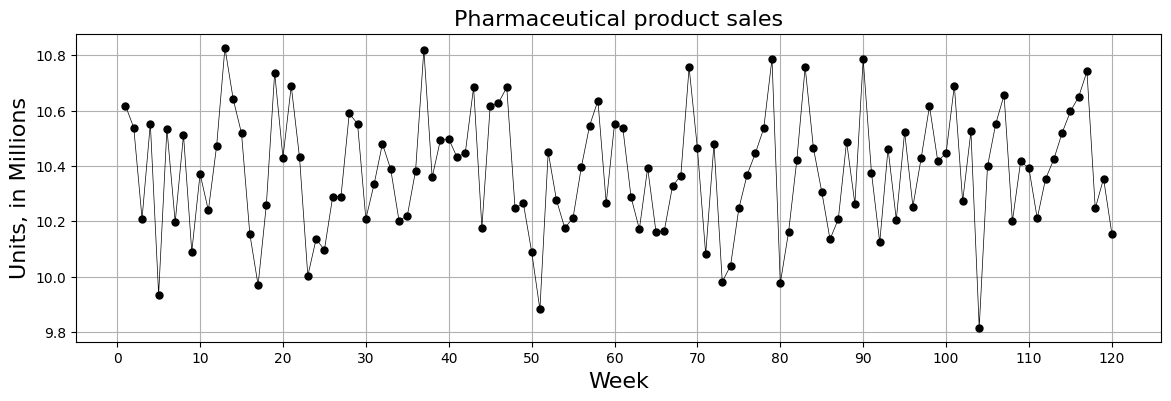

In [35]:
plot_ts(pharma.index,pharma['Sales']/1000,zero = False,
       title='Pharmaceutical product sales',xlabel='Week',ylabel='Units, in Millions',dist=10)

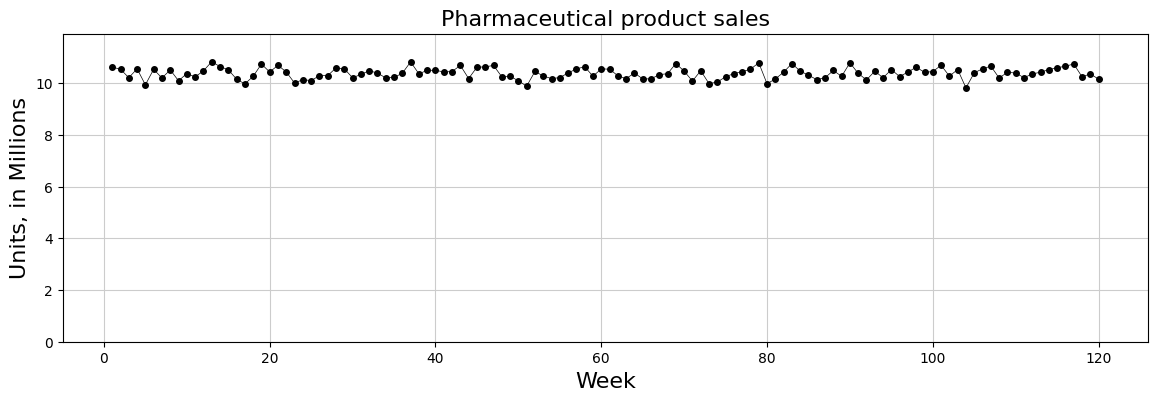

In [36]:
plot_ts(pharma.index, pharma.Sales/1000,zero = True,
       title='Pharmaceutical product sales',xlabel='Week',ylabel='Units, in Millions',marker=4)

**Aufgabe**  
**Berechne und interpretiere den empirischen Varianzkoeffizienten dieser Zeitreihe (empirische Standardabweichung / Mittelwert)**

### chemical

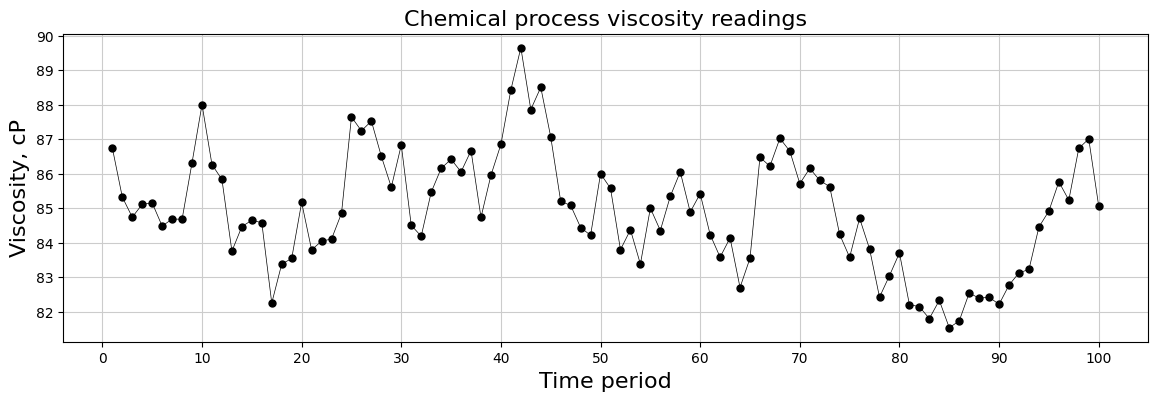

In [37]:
plot_ts(chemical.index, chemical.Reading,zero = False,
       title='Chemical process viscosity readings',xlabel='Time period',ylabel='Viscosity, cP',dist=10)

### gorgonzola

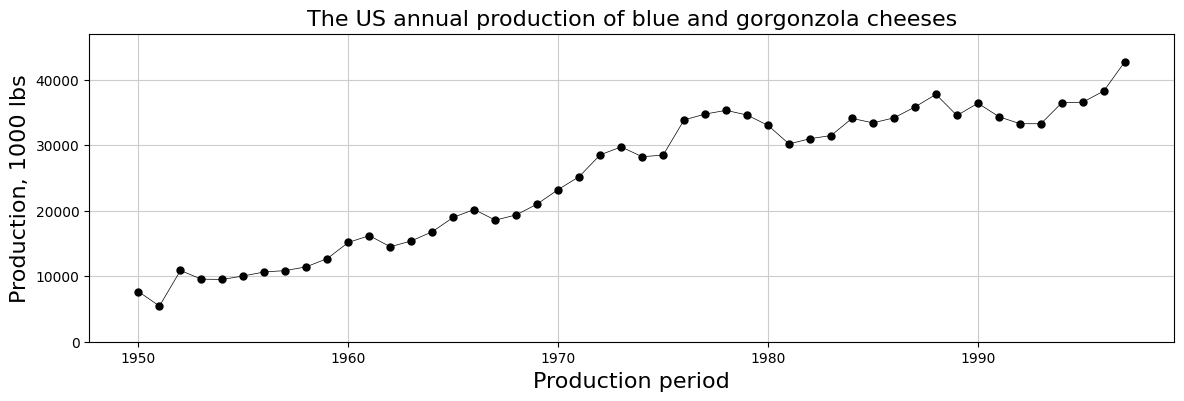

In [38]:
plot_ts(gorgonzola.index,gorgonzola.klb,zero = True,
       title='The US annual production of blue and gorgonzola cheeses',xlabel='Production period',ylabel='Production, 1000 lbs',dist=10)

### beverage

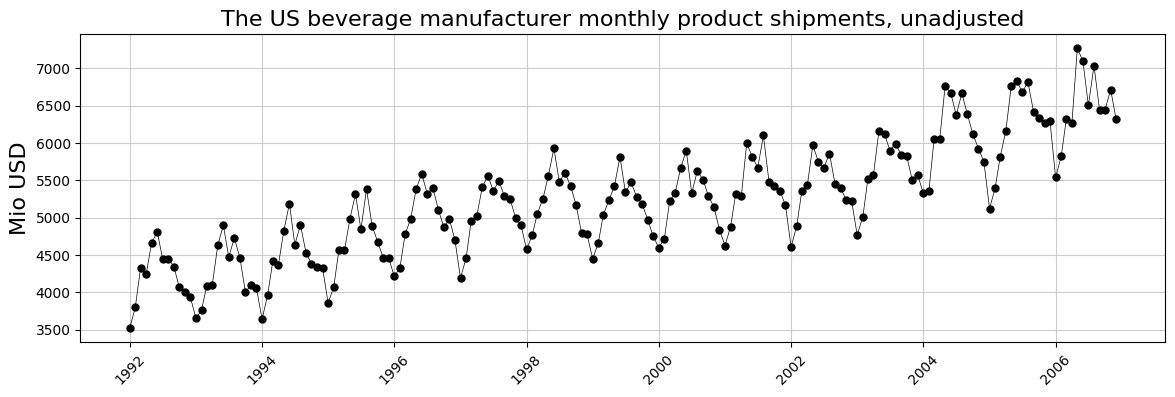

In [39]:
plot_ts(beverage.index,beverage.MilDollar,zero = False,
       title='The US beverage manufacturer monthly product shipments, unadjusted',xlabel='',ylabel='Mio USD',rot=45)

### globaltemp

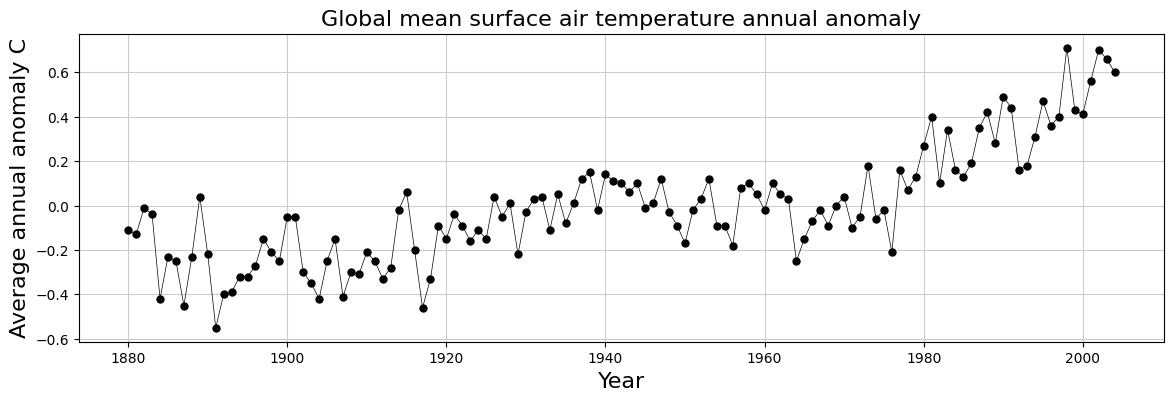

In [40]:
plot_ts(globaltemp.index, globaltemp.Anomaly,zero = False,
       title='Global mean surface air temperature annual anomaly',xlabel='Year',ylabel='Average annual anomaly C',dist=0, ticks=5000)

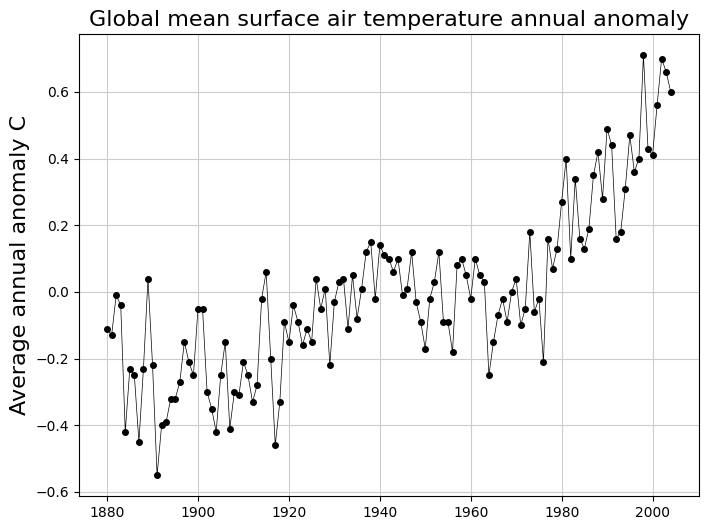

In [41]:
plot_ts(globaltemp.index,globaltemp.Anomaly,zero = False,title='Global mean surface air temperature annual anomaly',xlabel='',ylabel='Average annual anomaly C',w=8,h=6,marker=4)

Anbei aktualisierte Daten:

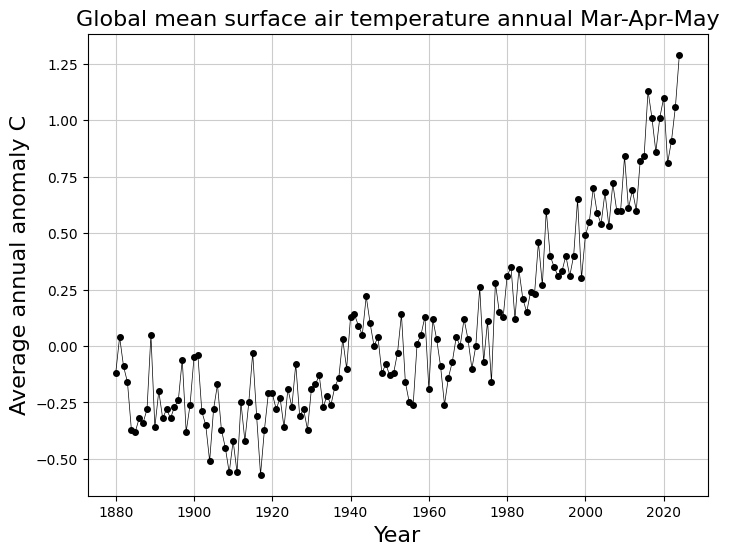

In [42]:
plot_ts(globaltemp2.index, globaltemp2['MAM'],zero = False,
       title='Global mean surface air temperature annual Mar-Apr-May',xlabel='Year',ylabel='Average annual anomaly C',w=8,h=6,marker=4)

### foods

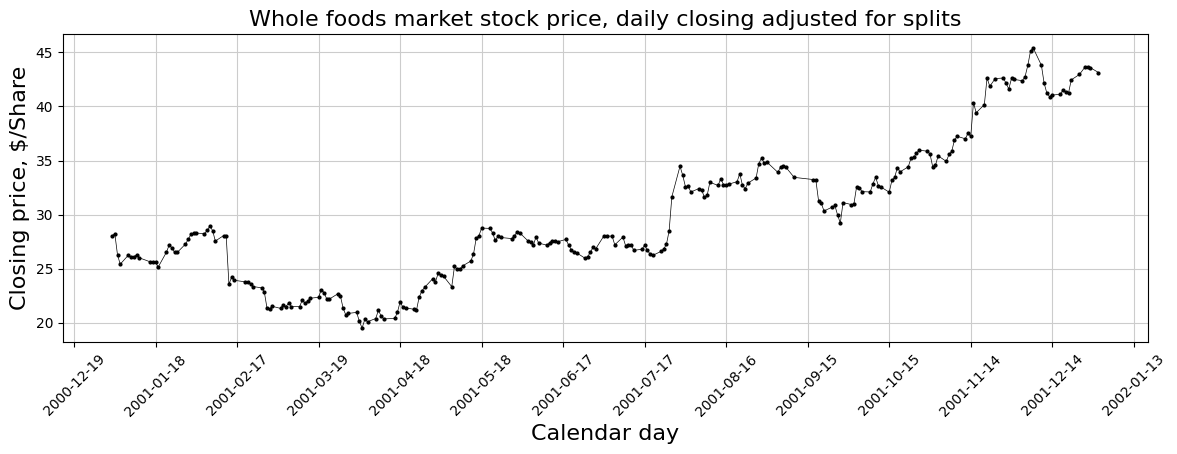

In [43]:
plot_ts(foods.index,foods['Dollar'],zero = False,
       title='Whole foods market stock price, daily closing adjusted for splits',xlabel='Calendar day',ylabel='Closing price, $/Share',marker=2,dist=30,rot=45)

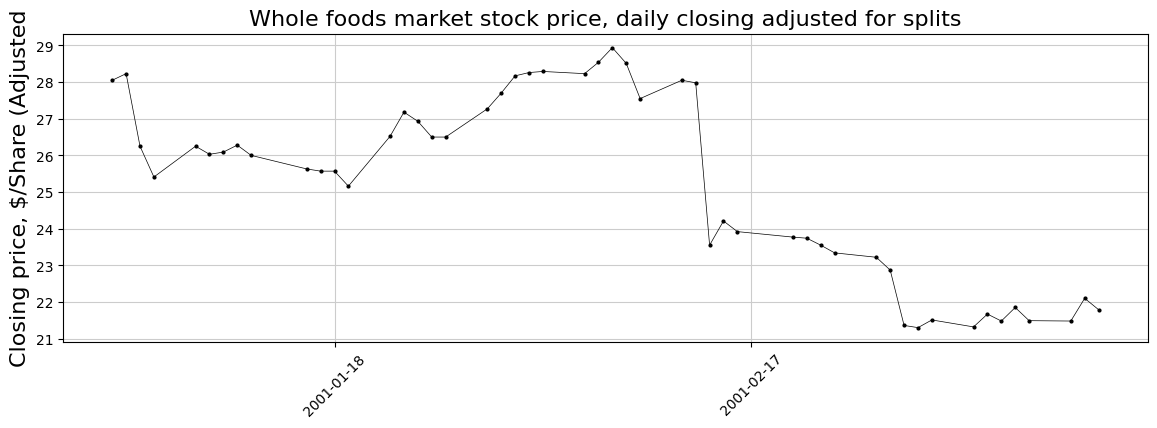

In [44]:
plot_ts(foods.index[0:50],foods.Dollar[0:50],zero = False,
       title='Whole foods market stock price, daily closing adjusted for splits',xlabel='',ylabel='Closing price, $/Share (Adjusted',marker=2,dist=30,rot=45)

### unemployment

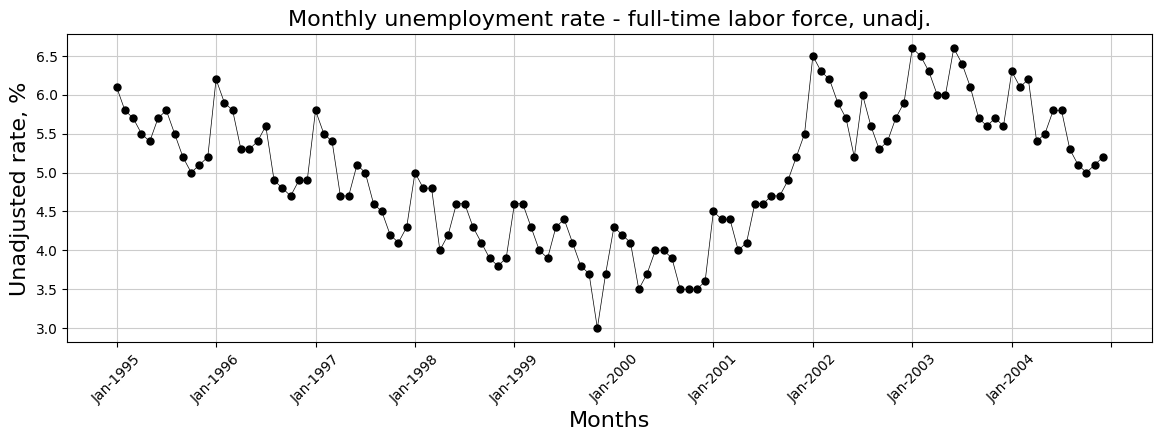

In [45]:
plot_ts(unemployment['Month'][384:], unemployment['Rate'][384:],zero = False,
       title='Monthly unemployment rate - full-time labor force, unadj.',xlabel='Months',ylabel='Unadjusted rate, %',
        rot=45, dist=12)

### sunspots

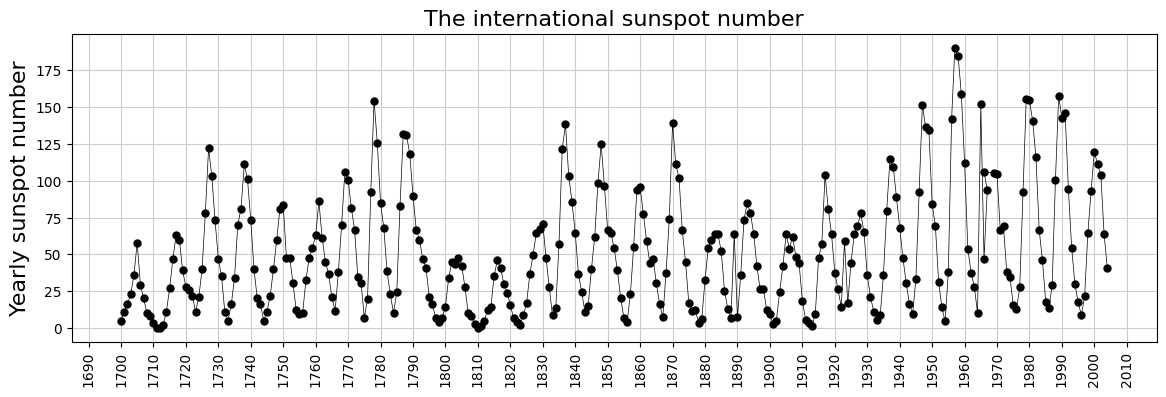

In [46]:
plot_ts(sunspots.index,sunspots.Sunspots,zero = False,
       title='The international sunspot number',xlabel='',ylabel='Yearly sunspot number',dist=10,rot=90)

### ukmiles

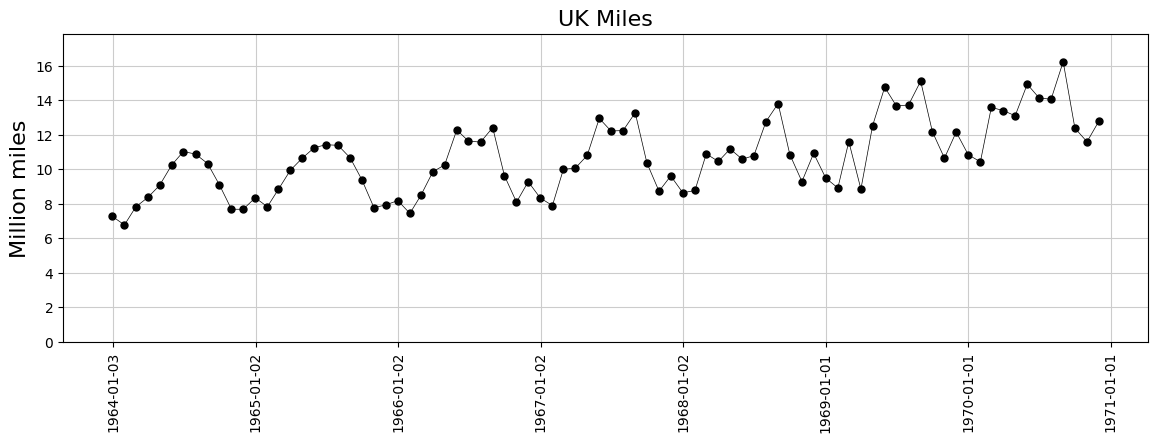

In [47]:
plot_ts(ukmiles.index,ukmiles.MioMiles,zero = True,
       title='UK Miles',xlabel='',ylabel='Million miles',dist=365,rot=90)

### Ungewöhnliche Bebachtungen

<img src="pics/Mont-Fig-1-10.PNG" alt="Drawing" style="width: 700px;"/>

Antwort:

<img src="pics/Mont-Fig-1-11.PNG" alt="Drawing" style="width: 700px;"/>

Antwort:

**Diskussion:**    
Warum sind Histogramme oder Boxplots für Zeitreihen nicht besonders geeignet?

# Empfehlungen für eine visuelle Analyse

<b>
<ul>
<li>als erstes die Überschrift lesen
<li>dann die beiden Achsenbeschriftungen:<br>
    ist Ursprung enthalten, sind Achsen transformiert, Einheiten der Werte
<li>Beschreibung der Zeitreihe: von groben zum detail übergehen
</ul>
</b>

# Interaktive Analyse - Plotly

<ul>
<li><b>Plotly</b> ist ein Beispiel für eine Library, mit der es möglich ist, Zeitreihen interaktiv zu analysieren.
<li>Anbei ein Bespiel mit dem - besonders bei langen Zeitreihen - nützlichen Tools eines <b>Range Slider</b>:<br>
A range slider is a small subplot-like area below a plot which allows users to pan and zoom the X-axis while maintaining an overview of the chart.
</ul>

In [48]:
import plotly.express as px

fig = px.line(x=sunspots.index, y=sunspots.Sunspots, title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

ModuleNotFoundError: No module named 'plotly'